In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
tbl = pd.read_csv("/shared-data/csvdata/ah_quantitytype.csv", nrows=None)
tbl.head(5)


/tmp/ipykernel_4770/769000391.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  tbl = pd.read_csv("/shared-data/csvdata/ah_quantitytype.csv", nrows=None)


,Unnamed: 0,bd_id,startDate,endDate,type,unit,value
0,0,3,2020-12-03 12:49:08,2020-12-03 12:49:08,HKQuantityTypeIdentifierBodyMassIndex,count,35.4
1,1,3,2021-10-18 08:25:04,2021-10-18 08:25:04,HKQuantityTypeIdentifierBodyMassIndex,count,37.9
2,2,3,2021-11-03 09:39:04,2021-11-03 09:39:04,HKQuantityTypeIdentifierBodyMassIndex,count,37.6
3,3,3,2021-11-15 10:46:15,2021-11-15 10:46:15,HKQuantityTypeIdentifierBodyMassIndex,count,37.5
4,4,3,2021-11-23 11:47:24,2021-11-23 11:47:24,HKQuantityTypeIdentifierBodyMassIndex,count,37.7


In [12]:
df = tbl.copy()
df["mydate"] = pd.to_datetime(df["startDate"])
df = df[df["mydate"]>pd.to_datetime("2022-02-01")]
df = df[df["mydate"]<pd.to_datetime("2022-02-07")]
df = df.set_index("mydate")


In [13]:
df["bd_id"].unique()


array([ 3, 16, 21, 25, 26, 29, 47, 55, 58, 78])

In [14]:
df["type"].value_counts()[:40]


HKQuantityTypeIdentifierActiveEnergyBurned                45462
HKQuantityTypeIdentifierBasalEnergyBurned                 27216
HKQuantityTypeIdentifierHeartRate                         18261
HKQuantityTypeIdentifierDistanceWalkingRunning            14017
HKQuantityTypeIdentifierBloodGlucose                       8962
HKQuantityTypeIdentifierStepCount                          5464
HKQuantityTypeIdentifierDistanceCycling                    3919
HKQuantityTypeIdentifierInsulinDelivery                    2765
HKQuantityTypeIdentifierAppleExerciseTime                  2058
HKQuantityTypeIdentifierAppleStandTime                     1773
HKQuantityTypeIdentifierWalkingSpeed                       1346
HKQuantityTypeIdentifierWalkingStepLength                  1346
HKQuantityTypeIdentifierHeadphoneAudioExposure             1261
HKQuantityTypeIdentifierWalkingDoubleSupportPercentage      907
HKQuantityTypeIdentifierFlightsClimbed                      572
HKCategoryTypeIdentifierAppleStandHour  

In [15]:
fields = {
            "aeb": "HKQuantityTypeIdentifierActiveEnergyBurned",
            "beb": "HKQuantityTypeIdentifierDietaryCarbohydrates",
            "id": "HKQuantityTypeIdentifierInsulinDelivery",
            "dc": "HKQuantityTypeIdentifierDietaryCarbohydrates",
            "hr": "HKQuantityTypeIdentifierHeartRate",
            #"ss": "HKCategoryTypeIdentifierSleepAnalysis",
            "bg":"HKQuantityTypeIdentifierBloodGlucose"
         }

In [126]:
bd_id = 78

ds = {}
for key in fields.keys():
    tmp = df[df["type"]==fields[key]]
    print(key, tmp.shape, tmp["bd_id"].unique())
    tmp = tmp[tmp["bd_id"]==bd_id]
    print("pick bd_id:", bd_id, tmp.shape, tmp["bd_id"].unique(), "\n")
    ds[key] = tmp.sort_index().copy()


aeb (45462, 7) [ 3 16 29 47 55 58 78]
pick bd_id: 78 (9880, 7) [78] 

beb (83, 7) [25 78]
pick bd_id: 78 (47, 7) [78] 

id (2765, 7) [25 78]
pick bd_id: 78 (873, 7) [78] 

dc (83, 7) [25 78]
pick bd_id: 78 (47, 7) [78] 

hr (18261, 7) [ 3 16 29 47 55 58 78]
pick bd_id: 78 (3916, 7) [78] 

bg (8962, 7) [16 25 26 58 78]
pick bd_id: 78 (1722, 7) [78] 



In [127]:
def myfloat(x):
    try:
        return float(x)
    except:
        return np.nan
      

0 aeb
1 beb
2 id
3 dc
4 hr
5 bg


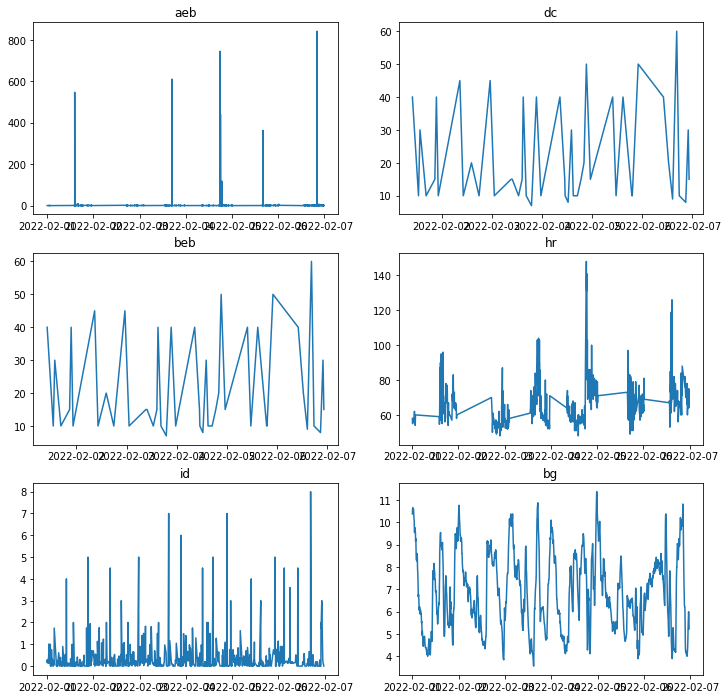

In [128]:
fig, axs = plt.subplots(3,2, figsize=(12,12))
for i, key in enumerate(fields.keys()):
    print(i, key)
    tmp = ds[key]
    axs[i%3,i//3].plot(tmp["value"].sort_index())
    axs[i%3,i//3].set_title(key)

plt.show()

mydate
2022-02-06 22:56:30    0.325
2022-02-06 23:01:30     0.25
2022-02-06 23:06:32     0.15
2022-02-06 23:26:32    0.025
2022-02-06 23:31:32      0.0
Name: value, dtype: object
                        value
2022-02-06 22:56:30  0.325000
2022-02-06 23:01:30  0.250000
2022-02-06 23:06:32  0.150000
2022-02-06 23:26:32  0.004167
2022-02-06 23:27:32  0.004167
2022-02-06 22:56:30
val value    0.75
dtype: float64 value    0.75
dtype: float64
                     value
2022-02-06 22:55:00  0.325
2022-02-06 23:00:00  0.250
2022-02-06 23:05:00  0.150
2022-02-06 23:10:00  0.000
2022-02-06 23:15:00  0.000


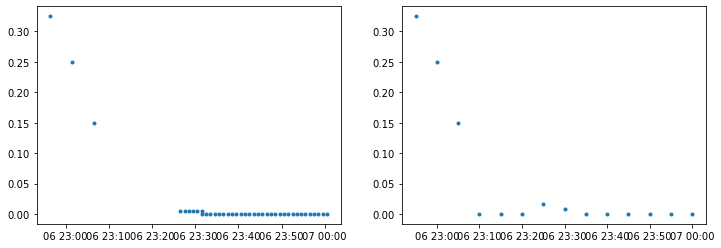

In [129]:
#ti = pd.date_range(start="2018-01-01", end="2018-01-02", freq="H")
#n = len(ti)

def distribute_interval(value, start, end, freq):
    ti = pd.date_range(start=start, end=end, freq=freq)
    n = len(ti) 
    return pd.DataFrame(np.ones(n)*value/n, index=ti, columns=["value"])

#distribute_interval(75., start="2018-01-01", end="2018-01-02", freq="min")

#for idx, row in df.head().iterrows():
#    print(row["startDate"],row["endDate"],row["value"])
    
def expand_intervals(df_):
    temp = [distribute_interval(row["value"], row["startDate"],row["endDate"], freq="min") 
               for idx, row in df_.iterrows()]
    return pd.concat(temp)

tst = ds["id"].tail(5)
print(tst["value"].head())

tmp = expand_intervals(tst)
print(tmp.head())

start = tmp.index[0]
print(start)

val = tmp.resample('5min').sum() # , origin='2022-02-06 04:53:00'
print("val", val.sum(), tmp.sum())
print(val.head())

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(tmp, '.')
axs[1].plot(val, '.')
plt.show()

del tmp, tst, val, start


In [132]:
ds["eb"] = pd.concat([expand_intervals(ds["aeb"]),expand_intervals(ds["beb"])]).sort_index()
print("eb:", ds["eb"]["value"].sum(), ds["aeb"]["value"].sum()+ds["beb"]["value"].sum())

ds["ia"] = expand_intervals(ds["id"]).sort_index()
print("ia:", ds["ia"]["value"].sum(), ds["id"]["value"].sum())


eb: 8607.183 8607.183000000041
ia: 296.807258933 296.8072589329997


In [133]:
start = ds["bg"].index[0]
start


Timestamp('2022-02-01 00:02:23')

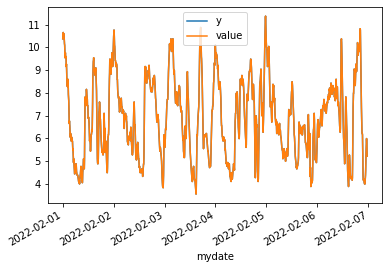

In [134]:
ts = ds["bg"]["value"].apply(myfloat).resample('5min', origin=start).nearest()
ts = pd.DataFrame(ts)
ts.columns=["y"]
ts.head()
ts["y"].plot()
ds["bg"]["value"].plot()
plt.legend()
plt.show()

8597.573 8607.183


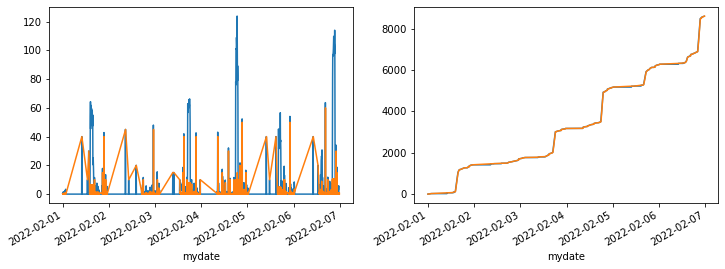

In [142]:
ts["a"] = ds["eb"]["value"].fillna(0).resample('5min', origin=start).sum()
ts = ts.fillna(0)
print(ts["a"].sum(), ds["eb"]["value"].sum())
fig, axs = plt.subplots(1,2,figsize=(12,4))
ts["a"].plot(ax=axs[0])
ds["eb"]["value"].plot(ax=axs[0])
ts["a"].cumsum().plot(ax=axs[1])
ds["eb"]["value"].cumsum().plot(ax=axs[1])
plt.show()
#ts.head()



296.557258933 296.807258933


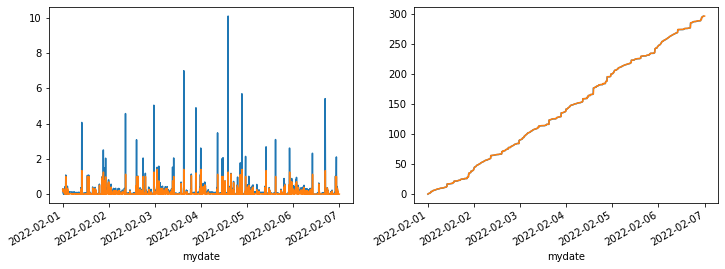

In [141]:
ts["b"] = ds["ia"]["value"].fillna(0).resample('5min', origin=start).sum()
ts = ts.fillna(0)
print(ts["b"].sum(), ds["ia"]["value"].sum())
fig, axs = plt.subplots(1,2,figsize=(12,4))
ts["b"].plot(ax=axs[0])
ds["ia"]["value"].plot(ax=axs[0])
ts["b"].cumsum().plot(ax=axs[1])
ds["ia"]["value"].cumsum().plot(ax=axs[1])
plt.show()
#ts.head()


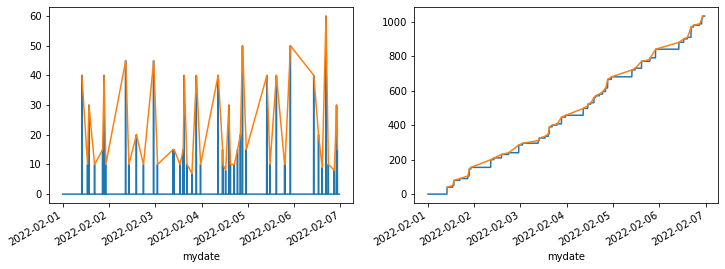

In [139]:
ts["c"] = ds["dc"]["value"].resample('5min', origin=start).sum()
ts = ts.fillna(0)
fig, axs = plt.subplots(1,2,figsize=(12,4))
ts["c"].plot(ax=axs[0])
ds["dc"]["value"].plot(ax=axs[0])
ts["c"].cumsum().plot(ax=axs[1])
ds["dc"]["value"].cumsum().plot(ax=axs[1])
plt.show()
#ts.tail()
